<a href="https://colab.research.google.com/github/sheraphineshovan/Imarticus_miniproject/blob/main/Driver_alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip '/content/stayalert (1).zip'

Archive:  /content/stayalert (1).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier

In [4]:
train = pd.read_csv("/content/fordTrain.csv")
test = pd.read_csv('/content/fordTest.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [6]:
train.isnull().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  int64  
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [60]:
test.isnull().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

In [9]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [10]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<AxesSubplot:>

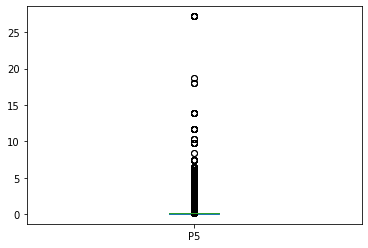

In [11]:
train['P5'].plot(kind = 'box')

<AxesSubplot:>

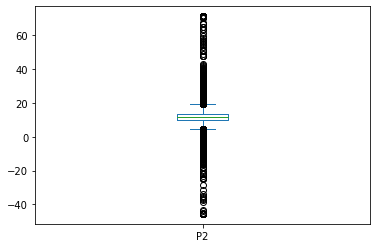

In [12]:
train['P2'].plot(kind = 'box')

Bi-Variate Analysis

<AxesSubplot:>

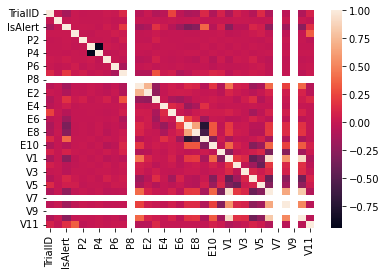

In [13]:
sns.heatmap(train.corr())

In [14]:
x = train.iloc[:,3:]

In [15]:
y = train['IsAlert']

In [16]:
print(x.shape)
print(y.shape)

(604329, 30)
(604329,)


Split data into train and test

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [21]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.71
[[130399  72928]
 [ 65193 214943]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    203327
           1       0.75      0.77      0.76    280136

    accuracy                           0.71    483463
   macro avg       0.71      0.70      0.71    483463
weighted avg       0.71      0.71      0.71    483463



In [22]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.71
[[32998 18219]
 [16315 53334]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66     51217
           1       0.75      0.77      0.76     69649

    accuracy                           0.71    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.71      0.71    120866



Decision Tree Prediction

In [31]:
  dtree = DecisionTreeClassifier()
  dtree.fit(x_train,y_train)
  preds_dtree_train = dtree.predict(x_train)
  preds_dtree_test = dtree.predict(x_test)

In [32]:
acc_report(y_train,preds_dtree_train)

The accuracy is  1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [39]:
acc_report(y_test,preds_dtree_test)

The accuracy is  0.99
[[50476   741]
 [  787 68862]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



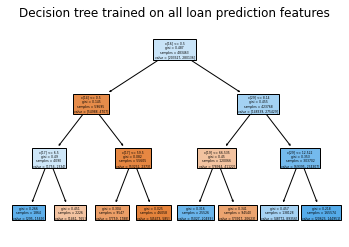

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()


Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [55]:
acc_report(y_train,preds_rf_train)

The accuracy is  1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [56]:
acc_report(y_test,preds_rf_test)

The accuracy is  0.99
[[50664   553]
 [   85 69564]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



Implementation of Adaboost

In [33]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [34]:
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual, predicted)
  print("the accuracy is", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [35]:
model_eval(y_train, preds_ada_train)

the accuracy is 0.86
[[158261  45066]
 [ 23870 256266]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82    203327
           1       0.85      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.85    483463
weighted avg       0.86      0.86      0.86    483463



In [36]:
model_eval(y_test, preds_ada_test)

the accuracy is 0.86
[[39912 11305]
 [ 5864 63785]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     51217
           1       0.85      0.92      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.85    120866
weighted avg       0.86      0.86      0.86    120866



Gradient boosting algorithm

In [37]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [40]:
model_eval(y_train, preds_gb_train)

the accuracy is 0.89
[[164928  38399]
 [ 14435 265701]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86    203327
           1       0.87      0.95      0.91    280136

    accuracy                           0.89    483463
   macro avg       0.90      0.88      0.89    483463
weighted avg       0.89      0.89      0.89    483463



In [41]:
model_eval(y_test, preds_gb_test)

the accuracy is 0.89
[[41553  9664]
 [ 3536 66113]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     51217
           1       0.87      0.95      0.91     69649

    accuracy                           0.89    120866
   macro avg       0.90      0.88      0.89    120866
weighted avg       0.89      0.89      0.89    120866



implementing test dataset into random forest model

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [48]:
test_x = test.iloc[:,3:]

In [53]:
test["IsAlert"] = rf.predict(test_x)

In [54]:
test['IsAlert'].value_counts()

1    96641
0    24199
Name: IsAlert, dtype: int64

In [58]:
solution = pd.read_csv('Solution.csv')

In [59]:
model_eval(solution['Prediction'],test['IsAlert'])

the accuracy is 0.83
[[16597 13317]
 [ 7602 83324]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61     29914
           1       0.86      0.92      0.89     90926

    accuracy                           0.83    120840
   macro avg       0.77      0.74      0.75    120840
weighted avg       0.82      0.83      0.82    120840

